In [1]:
# Basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import ticker

# Display options
from IPython.display import display
pd.options.display.max_columns = None

np.set_printoptions(threshold=30)

# Plots style
from cycler import cycler

matplotlib.rcParams['lines.linewidth'] = 3
matplotlib.rcParams['lines.markersize'] = 10

matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['xtick.color'] = '#A9A9A9'
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['ytick.color'] = '#A9A9A9'

matplotlib.rcParams['grid.color'] = '#ffffff'

matplotlib.rcParams['axes.facecolor'] = '#ffffff'

matplotlib.rcParams['axes.spines.left'] = False
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['axes.spines.top'] = False
matplotlib.rcParams['axes.spines.bottom'] = False

matplotlib.rcParams['axes.prop_cycle'] = cycler(color=['#2EBCE7', '#84EE29', '#FF8177'])

$$
\def\var{{\text{Var}}} % Variance
\def\corr{{\text{Corr}}} % Correlation
\def\cov{{\text{Cov}}} % Covariance
\def\expval{{\mathbb{E}}}
\newcommand\norm[1]{\lVert#1\rVert} % norm
\def\setR{{\rm I\!R}} % Sets
\def\rx{{\textrm{X}}} % Scalar random variables
\def\ry{{\textrm{Y}}}
\def\rz{{\textrm{Z}}}
\def\rvx{{\textbf{X}}} % Vector random variables
\def\rvy{{\textbf{Y}}}
\def\rvz{{\textbf{Z}}}
\def\vtheta{{\boldsymbol{\theta}}} % Vectors
\def\va{{\boldsymbol{a}}}
\def\vb{{\boldsymbol{b}}}
\def\vi{{\boldsymbol{i}}}
\def\vj{{\boldsymbol{j}}}
\def\vp{{\boldsymbol{p}}}
\def\vq{{\boldsymbol{q}}}
\def\vu{{\boldsymbol{u}}}
\def\vv{{\boldsymbol{v}}}
\def\vw{{\boldsymbol{w}}}
\def\vx{{\boldsymbol{x}}}
\def\vy{{\boldsymbol{y}}}
\def\vz{{\boldsymbol{z}}}
\def\evu{{u}} % Elements of vectors
\def\evv{{v}}
\def\evw{{w}}
\def\evx{{x}}
\def\evy{{y}}
\def\evz{{z}}
\def\mA{{\boldsymbol{A}}} % Matrices
\def\mB{{\boldsymbol{B}}}
\def\mC{{\boldsymbol{C}}}
\def\mD{{\boldsymbol{D}}}
\def\mI{{\boldsymbol{I}}}
\def\mQ{{\boldsymbol{Q}}}
\def\mS{{\boldsymbol{S}}}
\def\mT{{\boldsymbol{T}}}
\def\mU{{\boldsymbol{U}}}
\def\mV{{\boldsymbol{V}}}
\def\mW{{\boldsymbol{W}}}
\def\mX{{\boldsymbol{X}}}
\def\mLambda{{\boldsymbol{\Lambda}}}
\def\mSigma{{\boldsymbol{\Sigma}}}
\def\emA{{A}} % Elements of matrices
\def\emB{{B}}
\def\emX{{X}}
\def\tT{{T}} % Transformations
$$



Singular Value Decomposition
============================

In this last chapter, you’ll learn about Singular value decomposition
(SVD), which is a major topic of linear algebra, data science and
machine learning. You’ll see that you’ll need what you’ve learned so far
to dive into the SVD and see how it’s useful in data science.

I think that a key to understanding the SVD is to consider the input and
output spaces of a linear transformation. For this reason, you’ll dive
deeper into the idea of change of basis, then reconsider
eigendecomposition and build your understanding of the SVD on that.

The change of basis framework is interesting to conceive the effect of
eigendecomposition and SVD: you go to a new basis (using the inverse of
the change of basis matrix $\mQ^{-1}$) where the transformation is
associated with another matrix ($\mLambda$). Then you come back to the
old basis with the change of basis matrix ($\mQ$).

When a matrix expresses a linear transformation, it converts input
vectors into output vectors. These vectors can be expressed relative to
different spaces (if their bases are not specified, they are the
standard bases).

When you calculate the matrix $\mQ \mLambda \mQ^{-1}$, which corresponds
to the same linear transformation than $\mA$ relative to another basis,
you actually change the basis of the input vector and the basis of the
output vector. However, you’ll see that these input and output bases
can’t be the same with non-square matrices.

10.1 Non-square Matrices
------------------------

You can only apply eigendecomposition to square matrices because it uses
a single change of basis matrix, which implies that the initial vector
and the transformed vector are relative to the same basis. You go to
another basis with $\mQ$ to do the transformation, and you come back to
the initial basis with $\mQ^{-1}$.

As eigendecomposition, the goal of singular value decomposition (SVD) is
to decompose a matrix into simpler components: orthogonal and diagonal
matrices.

### 10.1.1 Different Input and Output Spaces

As you saw in
Section 7.1.3.2,
a non-square $m$ by $n$ matrix $\mA$ (with $m$ different from $n$) is
associated with a transformation that takes $n$-dimensional vectors and
gives $m$-dimensional vectors. The input and output spaces are
necessarily different since they have not the same number of dimensions.

For instance, take a 3 by 2 matrix $\mA$ ($m=3$ and $n=2$) that
transforms a vector $\vv$ into a vector $\vw$ such that:

$$
\mA \vv = \vw
$$

The shapes of $\mA$, $\vv$ and $\vw$ are illustrated in Figure
[179](#fig:ch11_shape_axb_3_2).

<img src="images/ch11_shape_axb_3_2.png" id="fig:ch11_shape_axb_3_2" width="200" alt="Figure 179: Shape of the matrix \mA and the vectors \vv and \vw corresponding to the equation \mA \vv = \vw." />
Figure 179: Shape of the matrix <span class="math inline">$\mA$</span> and the vectors <span class="math inline">$\vv$</span> and <span class="math inline">$\vw$</span> corresponding to the equation <span class="math inline">$\mA \vv = \vw$</span>.

If you look at $\vv$ and $\vw$, you can see that the input space
($\setR^2$) is different from the output space ($\setR^3$).

### 10.1.2 Specifying the Bases

The matrix associated with a linear transformation depends on the input
and output bases you choose.

Let’s take a linear transformation $\tT$ associated with the matrix
$\mA$ that converts a vector $\vv$ into the vector $\vw$.

#### Standard Basis

Let’s start with the simpler case: a standard basis for the input and
the output spaces. We’ll denote $\lbrack \vv \rbrack_{I}$ and
$\lbrack \vw \rbrack_{I}$ the vectors $\vv$ and $\vw$ relative to the
standard basis. The matrix $\mA$ converts the vector $\vv$ in the vetor
$\vw$. You can write:

$$
A \lbrack \vv \rbrack_{I} = \lbrack \vw \rbrack_{I}
$$

The input basis (the basis of the initial vector) and the output basis
(the basis of the transformed vector) are both the standard basis.

#### Same Non Standard Input and Output Bases

The transformation $\tT$ is associated with the matrix $\mA$ in the
standard basis, but let’s say you want to apply it to vectors in another
basis $\mB_1$, with $\mB_1$ being both the input and output basis. As
you saw in
Section 9.3.2,
the values of the transformation matrix depend on the basis, and thus,
applying the same matrix $\mA$ in the basis $\mB_1$ leads to a different
transformation.

Let’s call $\mA'$ the matrix associated with the transformation $\tT$ in
the basis $\mB_1$. You have:

$$
\mA' \lbrack \vv \rbrack_{\mB_1} = \lbrack \vw \rbrack_{\mB_1}
\qquad (10)$$

If you apply the matrix $\mA'$ to the vector $\vv$ in the basis $\mB_1$,
you get the vector $\vw$ in the same basis $\mB_1$.

In addition, as you saw in
Section 9.2.3.2, the
vectors relative to $\mB_1$ can be expressed as the vectors relative to
the standard basis. You have:

$$
\begin{aligned}
\mB_1 \lbrack \vv \rbrack_{\mB_1} &= \mI \lbrack \vv \rbrack_{\mI} \\\\
\mB_1^{-1}\mB_1\lbrack \vv \rbrack_{\mB_1} &= \mB_1^{-1} \mI\lbrack \vv \rbrack_{\mI} \\\\
\lbrack \vv \rbrack_{\mB_1} &= \mB_1^{-1} \lbrack \vv \rbrack_{\mI}
\end{aligned}
$$

and similarly for the vector $\vw$:

$$
\begin{aligned}
\mB_1 \left [ \vw \right ]_{\mB_1} &= \mI \lbrack \vw \rbrack_{\mI} \\\\
\mB_1^{-1} \mB_1 \left [ \vw \right ]_{\mB_1} &= \mB_1^{-1} \mI\lbrack \vw \rbrack_{\mI} \\\\
\left [ \vw \right ]_{\mB_1} &= \mB_1^{-1} \lbrack \vw \rbrack_{\mI}
\end{aligned}
$$

Replacing in equation [10](#eq:A_prime_B1), you obtain:

$$
\begin{aligned}
\mA' \lbrack \vv \rbrack_{\mB_1} &= \lbrack \vw \rbrack_{\mB_1} \\\\
\mA' \mB_1^{-1} \lbrack \vv \rbrack_{\mI} &= \mB_1^{-1} \lbrack \vw \rbrack_{\mI} \\\\
\mB_1  \mA' \mB_1^{-1} \lbrack \vv \rbrack_{\mI} &= \mB_1 \mB_1^{-1} \lbrack \vw \rbrack_{\mI} \\\\
\mB_1  \mA' \mB_1^{-1} \lbrack \vv \rbrack_{\mI} &= \lbrack \vw \rbrack_{\mI} \\\\
\end{aligned}
$$

This means that you can convert the vector $\vv$ into the vector $\vw$
using the matrix $\mB_1 \mA' \mB_1^{-1}$. And you know that, in the
standard basis, you can also use the matrix $\mA$ to transform the
vector $\vv$ into the vector $\vw$:

$$
\mA \lbrack \vv \rbrack_{\mI} = \lbrack \vw \rbrack_{\mI}
$$

This means that you have:

$$
\mA = \mB_1  \mA' \mB_1^{-1}
$$

and equivalently:

$$
\begin{aligned}
\mA &= \mB_1  \mA' \mB_1^{-1} \\\\
\mB_1^{-1} \mA &= \mB_1^{-1} \mB_1  \mA' \mB_1^{-1} \\\\
\mB_1^{-1} \mA &= \mA' \mB_1^{-1} \\\\
\mB_1^{-1} \mA \mB_1 &= \mA' \mB_1^{-1} \mB_1 \\\\
\mB_1^{-1} \mA \mB_1 &= \mA' \\\\
\mA' &= \mB_1^{-1}  \mA \mB_1 \\\\
\end{aligned}
$$

You have to apply $\mA'$ to do the transformation $\tT$ in the basis
$\mB_1$. Using the last equivalence, you can also apply
$\mB_1^{-1} \mA \mB_1$. The matrix $\mB_1$ change the basis of the
vector from $\mB_1$ to the standard basis, then you can apply the matrix
$\mA$, and finally, come back to the basis $\mB_1$ with $\mB_1^{-1}$.

#### Input and Output Bases

The last step is to see how to do the same transformation when the input
and the output bases are different.

Let’s call $\mA''$ ($\mA$ “double prime”) the matrix associated with the
transformation $\tT$ with the input basis $\mB_1$ and the output basis
$\mB_2$. You have:

$$
\mA'' \lbrack \vv \rbrack_{\mB_1} = \lbrack \vw \rbrack_{\mB_2}
\qquad (11)$$

Here is the trick: since the input vector $\vv$ is expressed relative to
the input basis $\mB_1$ and the output vector $\vw$ to the output basis
$\mB_2$, you need to change the basis of $\vv$ and $\vw$ differently.

Let’s see how you can go from the standard basis to $\mB_1$ and $\mB_2$.
You have the following mathematical relationship:

$$
\begin{aligned}
\mB_1 \lbrack \vv \rbrack_{\mB_1} &= \mI \lbrack \vv \rbrack_{\mI} \\\\
\lbrack \vv \rbrack_{\mB_1} &= \mB_1^{-1} \lbrack \vv \rbrack_{\mI}
\end{aligned}
$$

and

$$
\begin{aligned}
\mB_2 \left [ \vw \right ]_{\mB_2} &= \mI \lbrack \vw \rbrack_{\mI} \\\\
\left [ \vw \right ]_{\mB_2} &= \mB_2^{-1} \lbrack \vw \rbrack_{\mI}
\end{aligned}
$$

Replacing in equation [11](#eq:A_double_prime), you obtain:

$$
\begin{aligned}
\mA'' \lbrack \vv \rbrack_{\mB_1} &= \lbrack \vw \rbrack_{\mB_2} \\\\
\mA'' \mB_1^{-1} \lbrack \vv \rbrack_{\mI} &= \mB_2^{-1} \lbrack \vw \rbrack_{\mI} \\\\
\mB_2  \mA'' \mB_1^{-1} \lbrack \vv \rbrack_{\mI} &= \lbrack \vw \rbrack_{\mI} \\\\
\end{aligned}
$$

As before, this leads to the following expression:

$$
\mA = \mB_2  \mA'' \mB_1^{-1}
$$

and equivalently:

$$
\mA'' = \mB_2^{-1}  \mA \mB_1
$$

Let’s see what this means. You can use the matrix $\mB_2^{-1} \mA \mB_1$
to apply the transformation $\tT$ when the input basis is different than
the output basis. It converts the vector from the basis $\mB_1$ to the
standard basis with the matrix $\mB_1$, then it applies the
transformation $\mA$, and finally it goes to the basis $\mB_2$ with the
matrix $\mB_2^{-1}$.

Once again, this is important to keep in mind that when we talk about
linear transformations, it is in reference to an input and an output
basis. The entries of the transformation matrix $\mA$ are with respect
to these input and output bases.

Finding matrices similar to $\mA$ means finding a new basis *for both
the input and the output space*. This was previously hidden by the fact
that the input and output bases are the same in the eigendecomposition.
Different input and output bases in the SVD makes this statement crucial
for the following sections.

10.2 Expression of the SVD
--------------------------

With non-square matrices, the input space (before the transformation) is
different than the output space (after the transformation). Considering
different input and output bases allows you to decompose non square
matrices. You’ll see here that it leads to the formula of the SVD.

### 10.2.1 Notation

As you saw in the last section, while a single matrix $\mQ$ is used in
eigendecomposition, with the SVD, you have a matrix to change the basis
of $\vv$ and another one to change the basis of $\vw$. You had:

$$
\mA = \mB_2  \mA'' \mB_1^{-1}
$$

To fit with the standard notation of the SVD, let’s call the change of
basis matrix of the input vector $\mV$ instead of $\mB_1$ and the change
of basis matrix of the output vector $\mU$ instead of $\mB_2$. In
addition, let’s call $\mSigma$ (pronounced “capital Sigma”) the matrix
corresponding to the transformation with the new input and output basis
instead of $\mA''$. You have:

$$
\mA = \mU \mSigma \mV^{-1}
$$

Equivalently:

$$
\mSigma = \mU^{-1} \mA \mV
$$

You’re almost there: these last equations are almost expressing the SVD.

### 10.2.2 Singular Vectors and Singular Values

As you saw in Section 9.4, the
eigendecomposition of symmetric matrices gives orthogonal eigenvectors
(you can find more details about orthogonal vectors in
Section 5.1.3.4 and orthogonal
matrices in Section 6.4.5.) .
With the SVD, you add the constraint that $\mU$ and $\mV$ are
orthonormal. Since these matrices contains the basis vectors as columns,
it implies that the input and output bases are orthonormal.

Orthonormal bases are nice. The advantage of using orthogonal bases is
that you can decompose vectors into independent and separate components.
Calculating the length or angles of vectors is also simpler with
orthonormal bases.

#### Orthonormal Requirements

In words, with the SVD, you want a set of orthogonal vectors
$\left\{ \vv_1, \cdots, \vv_n \right\}$ (the columns of the change of
basis matrix $\mV$) relative to the *input space*, that gives a set of
orthogonal vectors $\left\{\vu_1, \cdots, \vu_n \right\}$ (the columns
of $\mU$) relative to the *output space*, scaled by
$\left\{\sigma_1, \cdots, \sigma_n \right\}$ (pronounced “sigma”; they
are the values in $\mSigma$).

An orthogonal matrix has the property that its inverse is equal to its
transpose. You can use this property to derive the equation of the SVD:

$$
\mA = \mU \mSigma \mV^{\text{T}}
$$

This is the equation of the SVD: you decompose $\mA$ into three matrices
$\mU$, $\mSigma$ and $\mV^{\text{T}}$. Since you constrained the vectors
$\left\{ \vv_1, \cdots, \vv_n \right\}$ and
$\left\{\vu_1, \cdots, \vu_n \right\}$ to be orthonormal, the matrices
$\mV$ and $\mU$ are orthonormal. Finally, $\mSigma$ is a diagonal
matrix.

The vectors in $U$ are called the *left singular vectors* and the
vectors in $\mV$, the *right singular vectors*. The values in the
diagonal of $\mSigma$ (all the other entries are zero since it is a
diagonal matrix) are called the *singular values*.

With the SVD, you don’t decompose $\mA$ into eigenvectors and
eigenvalues. You need two sets of vectors that are the left and right
singular vectors. These vectors are related by scaling values: the
singular values.

#### Set of Equations

As with eigendecomposition, you can write the SVD as a set of equations.
Going from the equation of the SVD, and using the fact that $\mV$ is
orthonormal, and thus $\mV^{\text{T}}\mV=\mV^{-1}\mV=\mI$, you have:

$$
\begin{aligned}
\mA &= \mU \mSigma \mV^{\text{T}} \\\\
\mA \mV &= \mU \mSigma \mV^{\text{T}}\mV \\\\
\mA \mV &= \mU \mSigma
\end{aligned}
$$

Developing what are inside these matrices, you can write:

$$
\mA
\begin{bmatrix}
    \vv_1 \cdots \vv_n
\end{bmatrix}
= \begin{bmatrix}
    \vu_1 \cdots \vu_n
\end{bmatrix}
\begin{bmatrix}
    \sigma_1 & 0 & 0 \\\\
    0 & \ddots & 0 \\\\
    0 & 0 & \sigma_n
\end{bmatrix}
$$

Leading to the following set of equations:

$$
\begin{cases}
\mA \vv_1 &= \sigma_1 \vu_1 \\\\
&\vdots \\\\
\mA \vv_n &= \sigma_n \vu_n
\end{cases}
$$

Keep these equations in mind: you’ll use them in the next section.

### 10.2.3 Finding the Singular Vectors and the Singular Values

#### The Special Matrices $\mA\mA^{\text{T}}$ and $\mA^{\text{T}}\mA$

Even if $\mA$ is not square, the matrices $\mA\mA^{\text{T}}$ and
$\mA^{\text{T}}\mA$ are square. For instance, if the shape of $\mA$ is
(3, 2), you have the following shapes:

-   $\mA$ is (3, 2).
-   $\mA^{\text{T}}$is (2, 3).
-   $\mA\mA^{\text{T}}$ is (3, 2)(2, 3): (3, 3).
-   $\mA^{\text{T}}\mA$ is (2, 3)(3, 2): (2, 2).

More generally, if $\mA$ is a $m$ by $n$ matrix, then
$\mA\mA^{\text{T}}$ is a $m$ by $m$ symmetric square matrix and
$\mA^{\text{T}}\mA$ is a $n$ by $n$ square matrix.

These matrices are also symmetric. For instance:

In [2]:
A = np.array([
    [1, 2],
    [4, 3],
    [7, 1]
])
A @ A.T

array([[ 5, 10,  9],
       [10, 25, 31],
       [ 9, 31, 50]])

For instance, the value 10 in the first row is calculated with
$4 \cdot 1 + 3 \cdot 2$, and the value 10 in the first column with
$1 \cdot 4 + 2 \cdot 3$, which gives the same result.

Since $\mA\mA^{\text{T}}$ and $\mA^{\text{T}}\mA$ are symmetric, they
have orthogonal eigenvectors and real eigenvalues.

Another property of these matrices is that their eigenvalues are all
non-negative. These matrices are said *positive semidefinite*: this is
important because, as you’ll soon see, you’ll take the square root of
their eigenvalues, so it would be defined only if they are non-negative.

You’ll see here that the singular vectors and singular values can be
found through the eigendecomposition of these special matrices
$\mA\mA^{\text{T}}$ and $\mA^{\text{T}}\mA$.

#### Eigenvectors of $\mA\mA^{\text{T}}$ and $\mA^{\text{T}}\mA$

Let’s see how the eigenvectors of $\mA\mA^{\text{T}}$ and
$\mA^{\text{T}}\mA$ correspond to the singular values.

In the context of SVD, you have $\mA=\mU \mSigma \mV^{\text{T}}$. So
$\mA\mA^{\text{T}}$ is:

$$
\mA\mA^{\text{T}} = (\mU \Sigma \mV^{\text{T}}) (\mU \mSigma \mV^{\text{T}})^{\text{T}}
$$

Remember from
Section 6.3.3 that the
transposition of a matrix product is:

$$
(\mA\mB\mC)^{\text{T}} = \mC^{\text{T}}\mB^{\text{T}}\mA^{\text{T}}
$$

so you have:

$$
\begin{aligned}
\mA\mA^{\text{T}} &= (\mU \mSigma \mV^{\text{T}}) (\mU \mSigma \mV^{\text{T}})^{\text{T}} \\\\
&= \mU \mSigma \mV^{\text{T}}(\mV^{\text{T}})^{\text{T}} \mSigma ^{\text{T}} \mU^{\text{T}} \\\\
&= \mU \mSigma \mV^{\text{T}} \mV \mSigma ^{\text{T}} \mU^{\text{T}}
\end{aligned}
$$

And since $\mV$ is orthogonal, $\mV^{\text{T}} \mV = \mI$ (see
Section 6.4.5) and you can
remove it from the equation:

$$
\mA\mA^{\text{T}} = \mU \mSigma \mSigma ^{\text{T}} \mU^{\text{T}}
$$

Since $\mSigma$ is diagonal, $\mSigma = \mSigma ^{\text{T}}$, so you can
simplify $\mSigma \mSigma ^{\text{T}}$ to $\mSigma^2$. In addition,
$\mU$ is orthogonal and thus $\mU^{\text{T}} \mU = \mI$. You have:

$$
\mA\mA^{\text{T}} = \mU \mSigma^2 \mU^{\text{T}}
$$

With a little rearrangement, you get:

$$
\begin{aligned}
\mA\mA^{\text{T}} &= \mU \mSigma^2 \mU^{\text{T}} \\\\
\mA\mA^{\text{T}} \mU &= \mU \mSigma^2 \mU^{\text{T}} \mU \\\\
\mA\mA^{\text{T}} \mU &= \mU \mSigma^2
\end{aligned}
$$

You saw in Section 9.4 that the
eigendecomposition formula is $\mA \mQ = \mQ \mLambda$ with $\mQ$ being
the eigenvectors and $\mLambda$ the eigenvalues of $\mA$ (with the
matrix $\mA$ being square). Similarly in the last equation, $\mU$ is the
matrix containing the eigenvectors of $\mA \mA^{\text{T}}$ and
$\mSigma^2$ contains the eigenvalues of $\mA \mA^{\text{T}}$.

If you apply the same logic to $\mA^{\text{T}}\mA$, you have:

$$
\begin{aligned}
\mA^{\text{T}}\mA &= (\mU \mSigma \mV^{\text{T}})^{\text{T}} (\mU \mSigma \mV^{\text{T}}) \\\\
\mA^{\text{T}}\mA &= (\mV^{\text{T}})^{\text{T}} \mSigma ^{\text{T}} \mU^{\text{T}} \mU \mSigma \mV^{\text{T}} \\\\
\mA^{\text{T}}\mA &= \mV \mSigma ^{\text{T}} \mSigma \mV^{\text{T}} \\\\
\mA^{\text{T}}\mA \mV &= \mV \mSigma^2
\end{aligned}
$$

The matrix $\mV$ contains the eigenvectors of $\mA^{\text{T}}\mA$ and
$\mSigma^2$ the eigenvalues of $\mA^{\text{T}}\mA$.

This shows that, to construct the SVD
($\mA = \mU \mSigma \mV^{\text{T}}$), the matrix $\mU$ must be the
eigenvectors of $\mA\mA^{\text{T}}$ and $\mV$ the eigenvectors of
$\mA^{\text{T}}\mA$.

#### Orthonormal Input Basis Gives Orthonormal Output Basis

In the context of the SVD, the vectors
$\left\{ \vv_1, \cdots, \vv_n \right\}$ are the eigenvectors of
$\mA^{\text{T}}\mA$. In this special case, the vectors
$\left\{ \vu_1, \cdots, \vu_n \right\}$ are orthonormal because the
vectors $\left\{ \vv_1, \cdots, \vv_n \right\}$ are chosen to be
orthonormal. Let’s see why.

You want to check that the pair of vectors $\vu_i$ and $\vu_j$ are
orthogonal if $\vv_i$ and $\vv_j$ are orthogonal. Mathematically, you
want to know if $\vu_i \vu_j^{\text{T}}=0$ when
$\vv_i \vv_j^{\text{T}}=0$.

First, you saw that:

$$
\mA \vv_i = \sigma_i \vu_i
$$

You can rearrange as:

$$
\vu_i = \frac{\mA \vv_i}{\sigma_i}
$$

So you have:

$$
\begin{aligned}
\vu_i^{\text{T}} \vu_j &= (\frac{\mA \vv_i}{\sigma_i})^{\text{T}} \frac{\mA \vv_j}{\sigma_j} \\\\
&= \frac{\vv_i^{\text{T}}\mA^{\text{T}}\mA \vv_j}{\sigma_i \sigma_j}
\end{aligned}
\qquad (12)$$

Since the vectors $\left\{ \vv_1, \cdots, \vv_n \right\}$ are the
eigenvectors of $\mA^{\text{T}}\mA$, you have:

$$
\mA^{\text{T}}\mA \vv_j = \sigma_j^2 \vv_j
$$

So by replacing in equation [12](#eq:u_transpose_u), you have:

$$
\begin{aligned}
\vu_i^{\text{T}} \vu_j &= \frac{\vv_i^{\text{T}}\mA^{\text{T}}\mA\vv_j}{\sigma_i \sigma_j} \\\\
&= \frac{\vv_i^{\text{T}} \sigma_j^2 \vv_j}{\sigma_i \sigma_j} \\\\
&= \frac{\vv_i^{\text{T}} \sigma_j \vv_j}{\sigma_i} \\\\
\vu_i^{\text{T}} \vu_j &= \frac{\sigma_j}{\sigma_i}\vv_i^{\text{T}} \vv_j
\end{aligned}
$$

This result shows that if the vectors
$\left\{ \vv_1, \cdots, \vv_n \right\}$ of $\mA^{\text{T}}\mA$ are
orthogonal, then $\vv_i^{\text{T}} \vv_j=0$ and thus the right-hand side
is equal to zero, and $\vu_i^{\text{T}} \vu_j=0$, meaning that the
vectors $\left\{ \vu_1, \cdots, \vu_n \right\}$ are also orthogonal.

#### Example

Let’s take the following matrix $\mA$:

In [3]:
A = np.array([
    [1, 2, 2],
    [3, 7, 6],
    [6, 2, 12],
    [3, 1, 6]
])

You can start by calculating the SVD of $\mA$ with Numpy:

In [4]:
U, Sigma, V_transpose = np.linalg.svd(A)

Let’s have a look at these matrices:

In [5]:
U.round(2)

array([[-0.16, -0.22,  0.96, -0.  ],
       [-0.49, -0.83, -0.27,  0.  ],
       [-0.76,  0.46, -0.02, -0.45],
       [-0.38,  0.23, -0.01,  0.89]])

In [6]:
Sigma.round(2)

array([17.44,  5.36,  0.  ])

In [7]:
V_transpose.round(2)

array([[-0.42, -0.33, -0.85],
       [ 0.15, -0.95,  0.29],
       [-0.89, -0.  ,  0.45]])

Now, you can calculate the eigenvectors and eigenvalues of
$\mA\mA^{\text{T}}$ and $\mA^{\text{T}}\mA$:

In [8]:
eigvals_AAT, eigvecs_AAT = np.linalg.eig(A @ A.T)
eigvecs_AAT.round(2)

array([[ 0.16,  0.22,  0.96, -0.06],
       [ 0.49,  0.83, -0.27,  0.02],
       [ 0.76, -0.46, -0.06,  0.45],
       [ 0.38, -0.23,  0.07, -0.89]])

You can note that the first two columns are identical with the first two
columns of $\mU$ calculated with the `np.linalg.svd()` function. The
other columns are not important because they don’t correspond to nonzero
singular values (`Sigma` contains only two nonzero values). In addition,
the signs are not necessarily the same: they can be reversed and lead to
the same result.

Let’s look at the eigenvectors of $\mA^{\text{T}}\mA$:

In [9]:
eigvals_ATA, eigvecs_ATA = np.linalg.eig(A.T @ A)
eigvecs_ATA.round(2).T

array([[ 0.42,  0.33,  0.85],
       [ 0.89, -0.  , -0.45],
       [ 0.15, -0.95,  0.29]])

The eigenvectors and eigenvalues are not necessarily sorted in the
output of the function `np.linalg.eig()`. (as it is explained here:
https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html)
This means that the eigenvectors corresponding to the largest
eigenvalues are not necessarily in the first positions.

Look at the eigenvalues of $\mA \mA^{\text{T}}$ and
$\mA^{\text{T}} \mA$. The nonzero values are the same and corresponds to
the squared singular values:

In [10]:
eigvals_ATA.round(2)

array([304.31,  -0.  ,  28.69])

In [11]:
eigvals_AAT.round(2)

array([304.31,  28.69,  -0.  ,  -0.  ])

In [12]:
(Sigma**2).round(2)

array([304.31,  28.69,   0.  ])

##### Reconstruction

Finally, you can reconstruct the matrix $\mA$ from the decomposition.
You’ll use only the nonzero singular values.

Since `Sigma` is just the list of the singular values, you need to
create a diagonal matrix with these values in the diagonal (using the
function `np.diag()`).

You also need to add a row of zeros to `Sigma` and `V_transpose` to have
matching shapes:

In [13]:
Sigma = np.diag(np.append(Sigma, 0))
V_transpose = np.vstack([V_transpose, np.array([0, 0, 0])])

U[:, :2] @ Sigma[:2, :] @ V_transpose[:, :]


array([[ 1.,  2.,  2.],
       [ 3.,  7.,  6.],
       [ 6.,  2., 12.],
       [ 3.,  1.,  6.]])

You can see that the matrix $\mA$ has been reconstructed.

### 10.2.4 Summary

As for eigendecomposition, let’s summarize how the matrix $\mA$ that can
be associated with different input and output bases, and corresponds to
the product of the three matrices $\mU \mSigma \mV^{\text{T}}$.

<img src="images/ch11_input_output_bases.png" id="fig:ch11_input_output_bases" width="500" alt="Figure 180: Change of basis when the output basis is different than the input basis." />
Figure 180: Change of basis when the output basis is different than the input basis.

Let’s inspect the different components in Figure
[180](#fig:ch11_input_output_bases) and let’s call $\tT$ the
transformation associated with the matrix $\mA$ in the standard basis.

The top left represents the input vector $\vv$ relative to the input
basis $\mB_1$ ($\lbrack \vv \rbrack_{\mB_1}$). When you apply $\mA$ to
this vector, you get the output vector $\vw$ relative to the output
basis $\mB_2$ ($\lbrack \vw \rbrack_{\mB_2}$, top right).
Mathematically, it is expressed as
$\lbrack \vw \rbrack_{\mB_2} = \mA \lbrack \vv \rbrack_{\mB_1}$.

With the SVD, you want to find another basis (in red, named $\mB_3$ in
the figure) where the transformation $\tT$ is associated with a diagonal
matrix $\mSigma$.

So, to reach $\lbrack \vw \rbrack_{\mB_2}$, you can also:

-   Bottom left: change the basis of $\vv$ from $\mB_1$ to a new basis
    $\mB_3$ using the matrix $\mV^{\text{T}}$. Mathematically, you have
    $\lbrack \vv \rbrack_{\mB_3} = \mV^{\text{T}} \lbrack \vv \rbrack_{\mB_1}$.
-   Bottom right: apply $\mSigma$ so you get the output vector $\vw$
    still in the basis $\mB_3$. You have:
    $\lbrack \vw \rbrack_{\mB_3} = \mSigma \mV^{\text{T}} \lbrack \vv \rbrack_{\mB_1}$.
-   Top right: change the basis from $\mB_3$ to $\mB_2$ with the change
    of basis $\mU$. You have:
    $\lbrack \vw \rbrack_{\mB_2} = \mU \mSigma \mV^{\text{T}} \lbrack \vv \rbrack_{\mV_1}$.

Going to the longest path, you do the same transformation than $\mA$,
but by applying three simpler transformations. Unlike
eigendecomposition, the second change of basis is not the inverse of the
first: the input basis of $\mA$ is different from its output basis.

10.3 Geometry of the SVD
------------------------

Considering matrices as linear transformations, the decomposition of a
matrix corresponds to the decomposition of the transformation into
multiple sub-transformations. In the case of the SVD, the transformation
is converted to three simpler transformations.

You’ll see three examples: one in two dimensions, one to compare the
transformations of the SVD and the eigendecomposition, and one in three
dimensions.

### 10.3.1 Two-Dimensional Example

You’ll see the action of these transformations using a custom function
`matrix_2d_effect()`. This function plots the unit circle (you can find
more details about the unit circle in
Section 5.3.3). and the basis
vectors transformed by a matrix.

Let’s start by using the function to see the effect of the following
matrix $\mA$.

$$
\mA = \begin{bmatrix}
    2 & 5 \\\\
    7 & 3
\end{bmatrix}
$$

It should show the unit circle and the basis vectors transformed by the
matrix:

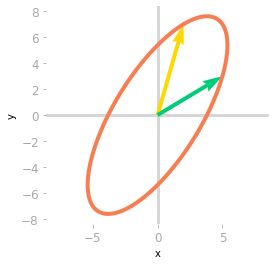

In [14]:
A = np.array([
    [2, 5],
    [7, 3]
])

from utils import matrix_2d_effect
plt.figure(figsize=(4, 4))

matrix_2d_effect(A)
# [...] Add labels

plt.xlabel("x")
plt.ylabel("y")
plt.show()


<img src="images/blank.png" id="fig:ch11_effect_of_A" alt="Figure 181: Effect of the matrix \mA on the unit circle and the basis vectors." />
Figure 181: Effect of the matrix <span class="math inline">$\mA$</span> on the unit circle and the basis vectors.

Figure [181](#fig:ch11_effect_of_A) illustrates the effect of $A$ on
your two-dimensional space. Let’s compare this to the
sub-transformations associated with the matrices of the SVD.

You can calculate the SVD of $\mA$ using Numpy:

In [15]:
U, Sigma, V_transpose = np.linalg.svd(A)

Remember that the matrices $\mU$, $\mSigma$ and $\mV$ contain
respectively the left singular vectors, the singular values and the
right singular vectors. You can consider $\mV^{\text{T}}$ as a first
change of basis matrix, $\mSigma$ as the linear transformation in this
new basis (this transformation should be a simple scaling since
$\mSigma$ is diagonal), and $\mU$ another change of basis matrix. You
saw that the SVD constraints both change of basis matrices $\mU$ and
$\mV^{\text{T}}$ to be orthogonal, meaning that the transformations will
be simple rotations.

To summarize, the transformation corresponding to the matrix $\mA$ is
decomposed into a rotation (or a reflexion, or a rotoreflexion), a
scaling, and another rotation (or a reflexion, or a rotoreflexion).

Let’s see the effect of each matrix successively:

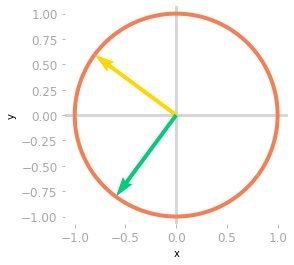

In [16]:

plt.figure(figsize=(4, 4))

matrix_2d_effect(V_transpose)

plt.xlabel("x")
plt.ylabel("y")
plt.show()


<img src="images/blank.png" id="fig:ch11_effect_of_V_T" alt="Figure 182: Effect of the matrix \mV^{\text{T}} on the unit circle and the basis vectors." />
Figure 182: Effect of the matrix <span class="math inline">$\mV^{\text{T}}$</span> on the unit circle and the basis vectors.

You can see in Figure [182](#fig:ch11_effect_of_V_T) that the basis
vectors have been rotated by the matrix $\mV^{\text{T}}$.

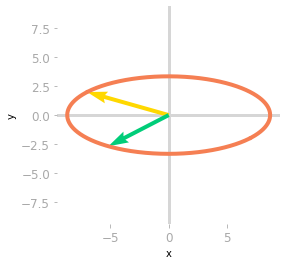

In [17]:

plt.figure(figsize=(4, 4))

matrix_2d_effect(np.diag(Sigma) @ V_transpose)

plt.xlabel("x")
plt.ylabel("y")
plt.show()


<img src="images/blank.png" id="fig:ch11_effect_of_V_T_sigma" alt="Figure 183: Effect of the matrices \mV^{\text{T}} and \mSigma." />
Figure 183: Effect of the matrices <span class="math inline">$\mV^{\text{T}}$</span> and <span class="math inline">$\mSigma$</span>.

Then, Figure [183](#fig:ch11_effect_of_V_T_sigma) shows that the effect
of $\mSigma$ is a scaling of the unit circle and the basis vectors.

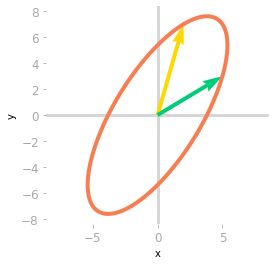

In [18]:

plt.figure(figsize=(4, 4))

matrix_2d_effect(U @ np.diag(Sigma) @ V_transpose)

plt.xlabel("x")
plt.ylabel("y")
plt.show()


<img src="images/blank.png" id="fig:ch11_effect_of_V_T_sigma_U" alt="Figure 184: Effect of the matrices \mV^{\text{T}}, \mSigma and \mU." />
Figure 184: Effect of the matrices <span class="math inline">$\mV^{\text{T}}$</span>, <span class="math inline">$\mSigma$</span> and <span class="math inline">$\mU$</span>.

Finally, a third rotation is applied by $\mU$. You can see in Figure
[184](#fig:ch11_effect_of_V_T_sigma_U) that the transformation is the
same as the one associated with the matrix $\mA$. You have decomposed
the transformation into a rotation, a scaling and a rotoreflection (look
at the basis vectors: a reflection has been done because the yellow
vector is on the left of the green vector, which was not the case
initially).

### 10.3.2 Comparison with Eigendecomposition

Since the matrix $\mA$ was square, you can compare this decomposition of
the matrix $\mA$ with eigendecomposition and use the same type of
visualization to get more insights about the difference between the two
methods.

Let’s calculate the eigendecomposition of $\mA$:

In [19]:
lambd, Q = np.linalg.eig(A)

Note that, since the matrix $\mA$ is not symmetric, the eigenvectors are
not orthogonal (their dot product is not equal to zero):

In [20]:
Q[:, 0] @ Q[:, 1]

-0.16609095970747995

Let’s see the effect of $\mQ^{-1}$ on the basis vectors and the unit
circle:

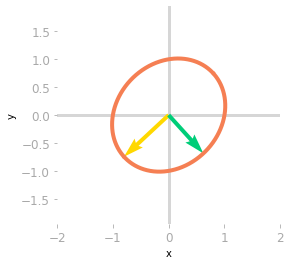

In [21]:

plt.figure(figsize=(4, 4))

ax = matrix_2d_effect(np.linalg.inv(Q))

ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()


<img src="images/blank.png" id="fig:ch11_effect_Q_inv" alt="Figure 185: Effect of the matrix \mQ^{-1}." />
Figure 185: Effect of the matrix <span class="math inline">$\mQ^{-1}$</span>.

You can see in Figure [185](#fig:ch11_effect_Q_inv) that $\mQ^{-1}$
rotates and scales the unit circle and the basis vectors. The
transformation of a non-orthogonal matrix is not a simple rotation.

The next step is to apply $\mLambda$.

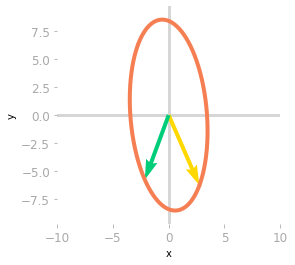

In [22]:

plt.figure(figsize=(4, 4))

ax = matrix_2d_effect(np.diag(lambd) @ np.linalg.inv(Q))

ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()


<img src="images/blank.png" id="fig:ch11_effect_Q_inv_lambda" alt="Figure 186: Effect of the matrix \mQ^{-1} and \mLambda." />
Figure 186: Effect of the matrix <span class="math inline">$\mQ^{-1}$</span> and <span class="math inline">$\mLambda$</span>.

The effect of $\mLambda$, shown in Figure
[186](#fig:ch11_effect_Q_inv_lambda) is a stretching and a reflection
through the y-axis (the yellow vector is now on the right of the green
vector).

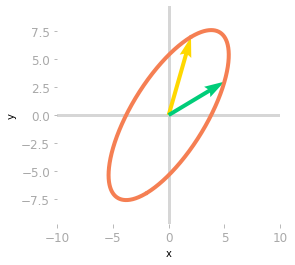

In [23]:

plt.figure(figsize=(4, 4))

ax = matrix_2d_effect(Q @ np.diag(lambd) @ np.linalg.inv(Q))

ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()


<img src="images/blank.png" id="fig:ch11_effect_Q_inv_lambda_Q" alt="Figure 187: Effect of the matrix \mQ^{-1}, \mLambda and \mQ." />
Figure 187: Effect of the matrix <span class="math inline">$\mQ^{-1}$</span>, <span class="math inline">$\mLambda$</span> and <span class="math inline">$\mQ$</span>.

The last transformation, shown in Figure
[187](#fig:ch11_effect_Q_inv_lambda_Q) corresponds to the change of
basis back to the initial one. You can see that it leads to the same
result than the transformation associated with $\mA$: both matrices
$\mA$ and $\mQ \mLambda \mQ^{-1}$ are similar: they correspond to the
same transformation in different bases.

It highlights the differences between eigendecomposition and SVD (note
that eigendecomposition was possible here because we choose $\mA$ square
to illustrate the difference between eigendecomposition and SVD.) . With
SVD, you have three different transformations, but two of them are only
rotation. With eigendecomposition, there are only two different matrices
but the transformation associated with $\mQ$ is not necessarily a simple
rotation (it is only the case when $\mA$ is symmetric).

### 10.3.3 Three-Dimensional Example

Since the SVD can be used with non square matrices, it is interesting to
see how the transformations are decomposed in this case.

First, non square matrices map two spaces that have a different number
of dimensions. Keep in mind that $m$ by $n$ matrices map a
$n$-dimensional space with a $m$-dimensional space.

Let’s take the example of a 3 by 2 matrix, mapping a two-dimensional
space to a three-dimensional space. This means that input vectors are
two-dimensional and output vectors three-dimensional. Take the matrix
$\mA$:

In [24]:
A = np.array([
    [2, 5],
    [1, 6],
    [7, 3]
])

To visualize the effect of $\mA$, you’ll still use the unit circle in
two dimensions and you’ll calculate the output for points on this
circle. Each point is considered as an input vector and you can observe
the effect of $\mA$ on each of these vectors.

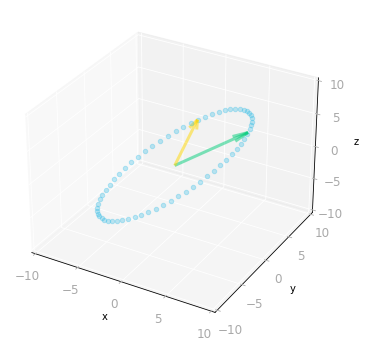

In [25]:

from utils import matrix_3_by_2_effect
plt.figure(figsize=(6, 6))

ax = matrix_3_by_2_effect(A)
# [...] Add styles axes, limits etc.

ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax.zaxis.set_major_locator(ticker.MultipleLocator(5))

ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

plt.show()


<img src="images/blank.png" id="fig:ch11_effect_of_A_3d" alt="Figure 188: Effect of the matrix A: it transforms vectors on the unit circle and the basis vectors from a two-dimensional space to a three-dimensional space." />
Figure 188: Effect of the matrix <span class="math inline"><em>A</em></span>: it transforms vectors on the unit circle and the basis vectors from a two-dimensional space to a three-dimensional space.

As expected, and as represented in Figure
[188](#fig:ch11_effect_of_A_3d), the two-dimensional unit circle is
transformed into a three-dimensional ellipse. Feel free to use the
notebook to be able to move the plot and have a better idea of the
three-dimensional shape.

What you can note is that the output vectors land all on a
two-dimensional plane. This is because the rank of $\mA$ is two. (remind
from Section 7.6.1 that the rank of a matrix
is the number of linearly independent columns or rows. The maximum rank
is the smaller number of rows or columns: in our example it is two.)

Now that you know the output of the transformation by $\mA$, let’s
calculate the SVD of $\mA$ and see the effects of the different
matrices, as you did with the two-dimensional example.

In [26]:
U, Sigma, V_transpose = np.linalg.svd(A)

The shape of the left singular vectors ($\mU$) is $m$ by $m$ and the
shape of the right singular vectors ($\mV^{\text{T}}$) is $n$ by $n$.
There are two singular values in the matrix $\mSigma$.

The transformation associated with $\mA$ is decomposed into a first
rotation in $\setR^{n}$ (associated with $\mV^{\text{T}}$, in the
example, $\setR^2$), a scaling going from $\setR^{n}$ to $\setR^{m}$ (in
the example, from $\setR^{2}$ to $\setR^{3}$), and a rotation in the
output space $\setR^{m}$ (in the example, $\setR^{3}$).

Let’s start to inspect the effect of $\mV^{\text{T}}$ on the unit
circle. You stay in two dimensions at this step:

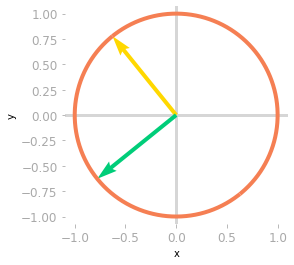

In [27]:

plt.figure(figsize=(4, 4))

matrix_2d_effect(V_transpose)

plt.xlabel("x")
plt.ylabel("y")
plt.show()


<img src="images/blank.png" id="fig:ch11_effect_of_V_T_2D" alt="Figure 189: Effect of the matrix \mV^{\text{T}}: at this step, you’re still in a two-dimensional space." />
Figure 189: Effect of the matrix <span class="math inline">$\mV^{\text{T}}$</span>: at this step, you’re still in a two-dimensional space.

You can see in Figure [189](#fig:ch11_effect_of_V_T_2D) that the basis
vectors have been rotated.

Then, you need to reshape $\mSigma$ because the function
`np.linalg.svd()` gives a one-dimensional array containing the singular
values. You want a matrix with the same shape of $\mA$: a 3 by 2 matrix
to go from 2D to 3D. This matrix contains the singular values as the
diagonal, the other values are zero.

Let’s create this matrix:

In [28]:
Sigma_full = np.zeros((A.shape[0], A.shape[1]))
Sigma_full[:A.shape[1], :A.shape[1]] = np.diag(Sigma)
Sigma_full

array([[9.99274669, 0.        ],
       [0.        , 4.91375758],
       [0.        , 0.        ]])

You can now add the transformation of $\mSigma$ to see the result in 3D
in Figure [190](#fig:ch11_effect_of_V_T_Sigma_3D):

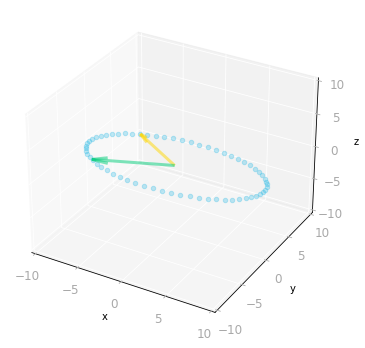

In [29]:

plt.figure(figsize=(6, 6))

ax = matrix_3_by_2_effect(Sigma_full @ V_transpose)
# [...] Add styles axes, limits etc.

ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax.zaxis.set_major_locator(ticker.MultipleLocator(5))

ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

plt.show()


<img src="images/blank.png" id="fig:ch11_effect_of_V_T_Sigma_3D" alt="Figure 190: Effect of the matrices \mV^{\text{T}} and \mSigma: since \mSigma is a three by two matrix, it transforms two-dimensional vectors into three-dimensional vectors." />
Figure 190: Effect of the matrices <span class="math inline">$\mV^{\text{T}}$</span> and <span class="math inline">$\mSigma$</span>: since <span class="math inline">$\mSigma$</span> is a three by two matrix, it transforms two-dimensional vectors into three-dimensional vectors.

Finally, you need to operate the last change of basis. You stay in 3D
because the matrix $\mU$ is a 3 by 3 matrix.

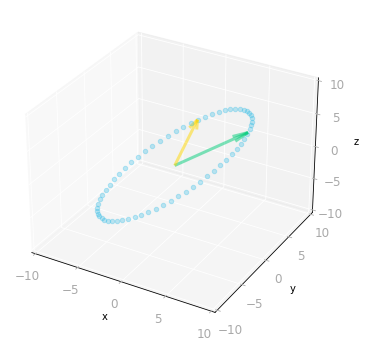

In [30]:

plt.figure(figsize=(6, 6))

ax = matrix_3_by_2_effect(U @ Sigma_full @ V_transpose)
# [...] Add styles axes, limits etc.


ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax.zaxis.set_major_locator(ticker.MultipleLocator(5))

ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

plt.show()


<img src="images/blank.png" id="fig:ch11_effect_of_V_T_Sigma_U_3D" alt="Figure 191: Effect of the three matrices \mV^{\text{T}}, \mSigma and \mU: the transformation is from a three-dimensional space to a three-dimensional space." />
Figure 191: Effect of the three matrices <span class="math inline">$\mV^{\text{T}}$</span>, <span class="math inline">$\mSigma$</span> and <span class="math inline">$\mU$</span>: the transformation is from a three-dimensional space to a three-dimensional space.

You can see in Figure [191](#fig:ch11_effect_of_V_T_Sigma_U_3D) that the
result is identical to the transformation associated with the matrix
$\mA$.

### 10.3.4 Summary

<img src="images/ch11_SVD_geometry.png" id="fig:ch11_SVD_geometry" width="500" alt="Figure 192: SVD in two dimensions." />
Figure 192: SVD in two dimensions.

Figure [192](#fig:ch11_SVD_geometry) summarizes the decomposition of a
matrix $\mA$ into three matrices. The transformation associated with
$\mA$ is done by the three sub-transformations. The notation is the same
as in Figure [192](#fig:ch11_SVD_geometry) and illustrates the geometric
perspective of the SVD.

10.4 Low-Rank Matrix Approximation
----------------------------------

Sometimes, like with data compression, it is desirable to find a reduced
version of a matrix that approximates it well. This is an application of
the SVD: if you keep the singular vectors corresponding to the largest
singular values, you get the best approximation for this number of
vectors.

### 10.4.1 Full SVD, Thin SVD and Truncated SVD

You saw in Section 7.6.1 that the rank of a
matrix is the number of linearly independent columns (that is equal to
the number of linearly independent rows). The SVD tells you something
important: the number of non-zero singular values found in the SVD
corresponds to the rank of the matrix.

For instance, take the following matrix $\mA$:

In [31]:
A = np.array([
    [1, 2],
    [2, 4],
    [3, 6]
])
np.linalg.matrix_rank(A)

1

The rank of the matrix is equal to 1. Let’ calculate the SVD of $\mA$
and have a look at the number of nonzero singular values.

In [32]:
np.linalg.svd(A)[1].round(2)

array([8.37, 0.  ])

You can see that there is only one nonzero singular value.

The rule is that for a $m$ by $n$ matrix with $m>n$, the maximum number
of nonzero singular values is $n$. In the preceding section, you filled
the diagonal matrix $\mSigma$ with zeros to match the shape $m$ by $n$.
This is called the *full svd* (in green in Figure
[193](#fig:ch11_full_thin_truncated_svd)).

It is possible to remove the rows of zeros in $\mSigma$ (the rows and
not the columns, because $m>n$: it would be the columns if $m<n$) and
the corresponding left or right singular vectors. This is called the
*thin SVD* or *reduced SVD* (in red in Figure
[193](#fig:ch11_full_thin_truncated_svd)).

Finally, it is possible to keep only $k$ singular vectors and singular
values (for some $k < \min\left\{ m, n \right\}$). In this case, the SVD
matrix is an approximation of the initial matrix $\mA$ because you loose
data. However, keeping only the singular vectors corresponding to large
singular values ensure that you have the best approximation of $\mA$ for
this lower rank ($k$) matrix. This is called the *truncated SVD* (in
blue in Figure [193](#fig:ch11_full_thin_truncated_svd)).

The difference between the full, the thin and the truncated SVD is
summarized in Figure [193](#fig:ch11_full_thin_truncated_svd) and shows
that you can select only a part of the matrices involved in the SVD to
compress data.

<img src="images/ch11_full_thin_truncated_svd.png" id="fig:ch11_full_thin_truncated_svd" width="500" alt="Figure 193: Comparison of the full SVD, the reduced SVD and the truncated SVD for a m by n matrix (with m&gt;n)." />
Figure 193: Comparison of the full SVD, the reduced SVD and the truncated SVD for a <span class="math inline"><em>m</em></span> by <span class="math inline"><em>n</em></span> matrix (with <span class="math inline"><em>m</em> &gt; <em>n</em></span>).

First, let’s see the full SVD, illustrated in green. You can see that
$\mU$ is $m$ by $m$: you keep the whole matrix. Then, $\mSigma$ is $m$
by $n$, meaning that you must add rows ($m-n$) filled with zeros.
Finally, $\mV^{\text{T}}$ is $n$ by $n$.

Second, the thin SVD is illustrated in red. In this case, you keep only
$n$ columns of $\mU$, you don’t add zeros in $\mSigma$ and you take the
whole matrix $\mV^{\text{T}}$, as with the full SVD.

Third, the truncated SVD is illustrated in blue. You choose a value of
$k$ for some $k < \min\left\{ m, n \right\}$ and keep only $k$ columns
of $\mU$, $k$ rows and $k$ columns of $\mSigma$ and $k$ rows of
$\mV^{\text{T}}$.

The same idea applies to the SVD of a $m$ by $n$ where $m<n$.

You’ll see the idea of low-rank matrix approximation in the context of
image compression in the hands-on project in
Section 10.5.

### 10.4.2 Decomposition into Rank One Matrices

The SVD decomposes a matrix into left and right singular vectors and
singular values. You can also consider it as the sum of $k$ rank one
matrices, with $k$ being the number of singular values (and their left
and right associated singular vectors) that you keep.

Let’s start with the full SVD and take the example of a 4 by 3 matrix
$\mA$ which has a rank of 3.

The shapes of $\mU$, $\mSigma$, and $\mV^{\text{T}}$ must respectively
be $(4 \times 4)$, $(4 \times 3)$ and $(3 \times 3)$. Since the rank of
the matrix is 3, there are only three nonzero singular values in
$\mSigma$. For this reason, the matrix $\mSigma$ is filled with 0 to
match the shape of $\mA$.

You can write $\mA$ as the following factorization:

$$
\begin{aligned}
\mA &= \mU \mSigma \mV^{\text{T}} \\\\
&=
\begin{bmatrix}
    \vu_1 & \vu_2 & \vu_3 & \vu_4
\end{bmatrix}
\begin{bmatrix}
    \sigma_1 & 0 & 0 \\\\
    0 & \sigma_2 & 0 \\\\
    0 & 0 & \sigma_3 \\\\
    0 & 0 & 0
\end{bmatrix}
\begin{bmatrix}
    \vv_1^{\text{T}} \\\\
    \vv_2^{\text{T}} \\\\
    \vv_3^{\text{T}}
\end{bmatrix} \\\\
&=
\begin{bmatrix}
    \sigma_1 \vu_1 & \sigma_2 \vu_2 & \sigma_3 \vu_3
\end{bmatrix}
\begin{bmatrix}
    \vv_1^{\text{T}} \\\\
    \vv_2^{\text{T}} \\\\
    \vv_3^{\text{T}}
\end{bmatrix} \\\\
&= \sigma_1 \vu_1 \vv_1^{\text{T}} + \sigma_2 \vu_2 \vv_2^{\text{T}} + \sigma_3 \vu_3 \vv_3^{\text{T}}
\end{aligned}
$$

Keep in mind that $\vu_1$, $\vu_2$, $\vu_3$ and $\vu_4$ are column
vectors (the columns of the matrix $\mU$), $\vv_1$, $\vv_2$, and $\vv_3$
are also column vectors, so their transpose $\vv_1^{\text{T}}$,
$\vv_2^{\text{T}}$, $\vv_3^{\text{T}}$ are row vectors (the rows of the
matrix $\mV^{\text{T}}$). However, $\sigma_1$, $\sigma_2$ and $\sigma_3$
are scalars (the diagonal of the matrix $\mSigma$).

Each element in this sum is a rank one matrix. Let’s consider that these
matrices are sorted according to the value of $\sigma_i$ in descending
order. The first element $\sigma_1 \vu_1 \vv_1^{\text{T}}$ is the rank
one matrix that best approximates $\mA$. If you take the first two
elements, you get the rank two matrix that best approximates $\mA$ and
so on.

10.5 Hands-On Project: Image Compression
----------------------------------------

The SVD is used in many data science and machine learning methods. Let’s
see an example where the SVD is applied to images.

To visually observe the effect of low rank approximation using the SVD,
you’ll use this method to compress an image.

Let’s start by loading the image (if you’re curious, this pattern has
been designed by William Morris in 1878:
https://www.metmuseum.org/art/collection/search/221485.) :

In [33]:
import imageio
img = imageio.imread('https://github.com/hadrienj/' \
    'essential_math_for_data_science/raw/master/data/birds_SVD.jpg')
img.shape

(819, 1024, 3)

You can see that the image is 819 pixels height, 1024 pixels width and
has 3 colors. Let’s display the image using Matplotlib:

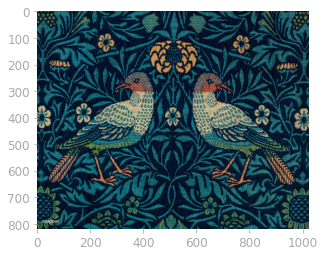

In [34]:
plt.imshow(img)

plt.show()


<img src="images/blank.png" id="fig:ch11_example_image" alt="Figure 194: The example image. You’ll use the SVD on it." />
Figure 194: The example image. You’ll use the SVD on it.

The goal is to calculate the SVD of the matrix corresponding to this
picture, and then to reconstruct the image from the rank one matrices.
You’ll see the effect of selecting an increasing number of these
matrices, which are selected in descending order of the singular values.
To do so, and since this is a color image, you’ll have to calculate the
SVD for each of the 3 colors.

Let’s have a look at this line of code. Starting from the right, you
take the first $k$ rows and all columns of $\mV^{\text{T}}$
(`V_transpose[:k, :]`), the first $k$ singular values as a diagonal
matrix (`np.diag(Sigma[:k])`) and all rows and the first $k$ columns of
$U$ (`U[:, :k]`).

This returns the initial matrix reconstructed from the $k$ rank one
matrices.

Let’s write this as a function looping across the three colors:

In [35]:
def reconstruct(img, k):
    reconstructed = np.zeros(img.shape)
    for i in range(img.shape[2]):
        U, Sigma, V_transpose = np.linalg.svd(img[:, :, i])
        reconstructed[:, :, i] = U[:, :k] @ np.diag(Sigma[:k]) @ V_transpose[:k, :]
    return reconstructed

Let’s try to reconstruct the image using only the first rank one matrix
($k=1$):

In [36]:
reconstructed = reconstruct(img, k=1)

Finally, you’ll need to rescale the reconstructed matrix to be able to
display it through Matplotlib.

Matplotlib understands images as floats or integers. It expects floating
values in the range 0 to 1, or integers in the range zero to 255.

To rescale the images between zero and one, you can use the following
function:

In [37]:
def rescale_img(img):
    rescaled = (img - img.min()) / (img.max() - img.min())
    return rescaled


Let’s plot the reconstructed image:

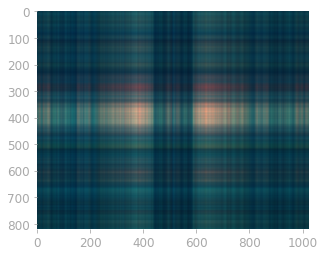

In [38]:
plt.imshow(rescale_img(reconstructed))

plt.show()


<img src="images/blank.png" id="fig:ch11_example_reconstructed_1_comp" alt="Figure 195: The image reconstructed with the first component only." />
Figure 195: The image reconstructed with the first component only.

It is hard to see something in Figure
[195](#fig:ch11_example_reconstructed_1_comp): the image is way too
compressed.

Let’s try for larger values of $k$:

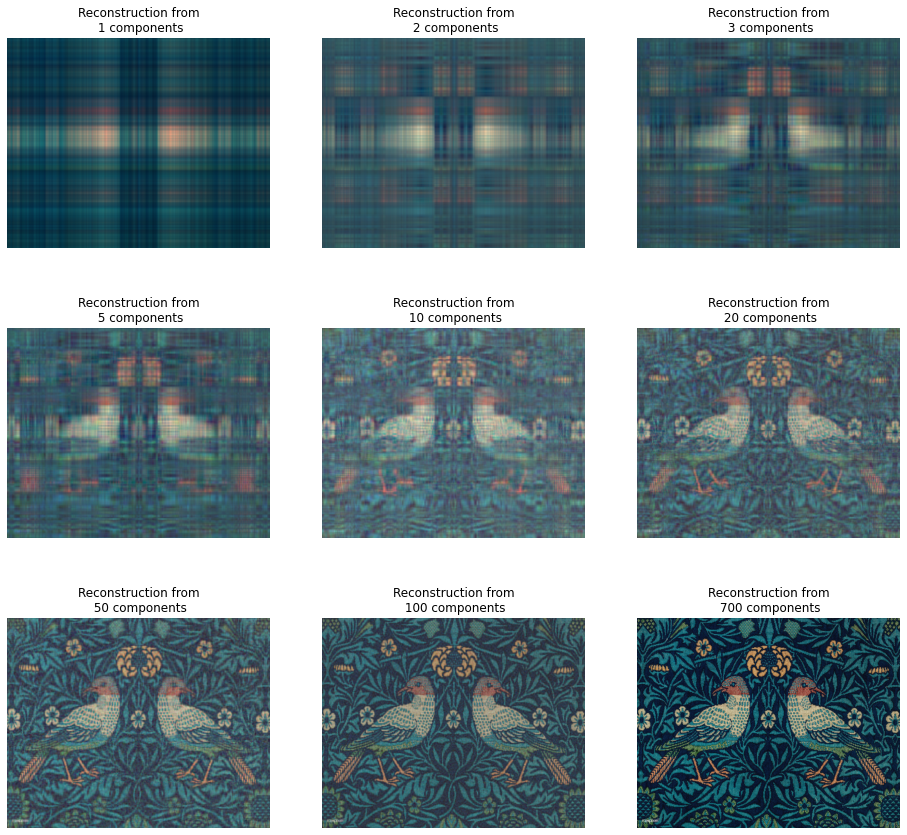

In [39]:
f, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 16))
f.subplots_adjust(hspace=0)

n_components = [1, 2, 3, 5, 10, 20, 50, 100, 700]

count = 0
for ax, n_component in zip(axes.flatten(), n_components):
    reconstructed = reconstruct(img, k=n_component)
    ax.axis('off')
    ax.imshow(rescale_img(reconstructed))
    ax.set_title(f"Reconstruction from\n {n_component} components")
    
    count += 1

plt.show()


<img src="images/blank.png" id="fig:ch11_example_reconstructed_comp" alt="Figure 196: Reconstruction using more and more components up to 700." />
Figure 196: Reconstruction using more and more components up to 700.

You can see in Figure [196](#fig:ch11_example_reconstructed_comp) that
even with 50 components, the reconstruction is not bad at all.

Let’s compare the number of values in the compressed and the initial
images. The initial image was 819 by 1024 for three colors, that is,
$819 * 1024 * 3 = 2,515,968$ values. Now, for 50 components you have the
left singular vectors that are $(m \times k)$, $k$ singular values, and
the right singular vectors that are $(k \times n)$. This gives you to

$$
((819 \cdot 50) + 50 + (50 \cdot 1024)) \cdot 3 = 276600
$$

This is only 276,600 values, which is a reduction almost by a factor 10.

Using an image allows you to visualize nicely the effect of truncated
SVD. However, you can use it in many different contexts, like to
compress the weights matrices used in deep neural networks (for
instance, Xue, Jian, Jinyu Li, and Yifan Gong. “Restructuring of deep
neural network acoustic models with singular value decomposition.”
Interspeech. 2013.) to reduce the size of the parameters needed to make
prediction without loosing too much accuracy.

